<a href="https://colab.research.google.com/github/sid781/SentimentAnalysis/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this kernel we will go through a sentiment analysis on imdb dataset using LSTM.

In [2]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1YFQduaJ57Lx0EvhStxafhSXKM-3jbIbe/view?usp=sharing'
  
import pandas as pd 
  
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('IMDB Dataset.csv')   
# Importing the dataset  
df = pd.read_csv('IMDB Dataset.csv') 
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Train-Test splitting

In [4]:
from sklearn.model_selection import train_test_split

X,y = df.review.values,df.sentiment.values
X_train, X_test, y_train, y_test = train_test_split(X,y)
# Check the shape of datasets
print("Train_shape:", X_train.shape)
print("Test_shape:", X_test.shape)

Train_shape: (37500,)
Test_shape: (12500,)


In [5]:
X_train

array(['Lame. Lame. Lame. Ultralame. Shall I go on? There is one, I repeat *one* funny scene in this entire, drawn-out, anti-amusing Amateur Hour Special of a film: Fares Fares\' fat father knocking someone over with his beer gut. That\'s it. The rest of this shockingly mediocre pile of nothingness consists of the usual trademark bored-looking Swedish "actors" delivering dialogue which goes into one ear and out of the other, a banal story, sloppy direction and, well, little else worth mentioning. Nepotistically cast Fares Fares is as charismatic as a chartered accountant and his nose rivals even that of Adrien Brody in terms of sheer ridiculous hugeness. Torkel Petersson should only work with Lasse Spang Olsen. The rest of the cast is, luckily, easily forgettable, whereas Fares\' humongous, titanic nose will forever haunt me in my dreams.<br /><br />Josef Fares helps ruin Swedish cinema. Don\'t support him and his nonsense. Jalla Jalla is to comedies what Arnold Schwarzenegger is to ch

In [6]:
y_train

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'positive'], dtype=object)

### Analysing of sentiment

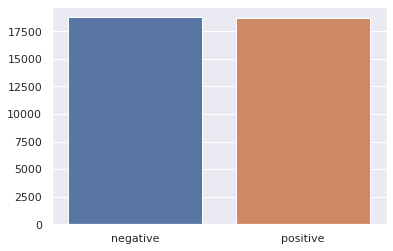

In [7]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
# Representaion of sentiments into bar gaph
count = pd.Series(y_train).value_counts()
x_labels=np.array(['negative','positive'])
sns.barplot(x=x_labels,y=count.values)
plt.show()

### Preprocessing

In [8]:
import re
from collections import Counter
from string import punctuation

def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

def onehot(X_train):
  universe = []
  
  for sentence in X_train:
    for word in sentence.lower().split():
        word = preprocess_string(word)
        if word not in punctuation:
            universe.append(word)

  corpus = Counter(universe)
  # sorting on the basis of most common words
  corpus_sorted = sorted(corpus,key=corpus.get,reverse=True)[:1000]
  # creating a dict
  vocab = {w:i+1 for i,w in enumerate(corpus_sorted)}
  return vocab

In [9]:
vocab=onehot(X_train)
len(vocab)

1000

### Tokenization

In [10]:
def tokenize(X_train,y_train,X_test,y_test):
  final_train, final_test = [],[]
  for sentence in X_train:
          final_train.append([vocab[preprocess_string(word)] 
                              for word in sentence.lower().split() 
                              if preprocess_string(word) in vocab.keys()])
  for sentence in X_test:
          final_test.append([vocab[preprocess_string(word)] 
                              for word in sentence.lower().split() 
                              if preprocess_string(word) in vocab.keys()])
          
  encoded_train = [1 if label =='positive' else 0 for label in y_train]  
  encoded_test = [1 if label =='positive' else 0 for label in y_test] 
  return (np.array(final_train), 
          np.array(encoded_train), 
          np.array(final_test), 
          np.array(encoded_test))

X_train,y_train,X_test,y_test = tokenize(X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [11]:
X_train

array([list([853, 853, 853, 9, 138, 20, 47, 6, 28, 9, 28, 152, 130, 7, 10, 414, 542, 305, 4, 2, 19, 357, 277, 127, 15, 24, 174, 8, 1, 350, 4, 10, 4, 4, 1, 633, 151, 404, 61, 261, 81, 28, 3, 45, 4, 1, 78, 2, 68, 462, 3, 73, 116, 324, 269, 177, 6, 14, 14, 2, 3, 24, 54, 11, 4, 7, 4, 652, 139, 60, 164, 15, 1, 350, 4, 1, 177, 6, 714, 77, 69, 7, 53, 12, 448, 87, 89, 3, 24, 6, 5, 48, 6, 5, 109, 111, 58, 25, 74, 71, 51, 43, 8, 67, 74, 2, 386, 3, 13, 319, 1, 86, 120, 32, 2, 173, 57, 3, 1, 91, 66, 26, 37, 71, 123, 70, 10, 37, 585, 23, 269, 144, 319, 85, 487, 49, 5, 26, 601]),
       list([9, 25, 74, 2, 618, 315, 4, 1, 207, 854, 4, 1, 232, 9, 13, 150, 169, 9, 280, 31, 1, 91, 3, 248, 28, 16, 48, 34, 36, 1, 169, 219, 3, 16, 1, 101, 3, 1, 336, 7, 793, 54, 7, 1, 665, 9, 194, 1, 4, 1, 101, 13, 73, 3, 1, 68, 4, 2, 745, 188, 251, 296, 11, 336, 1, 452, 6, 714, 1, 244, 4, 1, 219, 1, 207, 854, 9, 995, 15, 104, 11, 1, 4, 3, 6, 73, 18, 1, 421, 233, 1, 462, 32, 976, 3, 1, 305, 287, 23, 21, 4, 229, 51, 70, 2, 

In [12]:
X_test

array([list([9, 205, 10, 19, 16, 1, 52, 88, 59, 425, 150, 598, 3, 13, 57, 7, 33, 8, 6, 76, 3, 71, 123, 70, 22, 202, 25, 5, 102, 66, 8, 581, 5, 69, 66, 9, 407, 2, 22, 543, 470, 4, 1, 240, 40, 122, 201, 526, 42, 1, 112, 3, 1, 129, 61, 22, 702, 483, 97]),
       list([10, 6, 33, 17, 149, 11, 22, 117, 11, 192, 2, 162, 4, 22, 1, 59, 8, 58, 25, 591, 5, 327, 10, 711, 43, 22, 87, 38, 90, 22, 454, 38, 10, 17, 43, 1, 419, 6, 1, 78, 90, 22, 77, 52, 236, 38, 8, 29, 14, 561, 14, 12, 149, 43, 316, 126, 886, 10, 9, 507, 22, 38, 49, 16, 22, 27, 6, 179, 49, 200, 27, 1, 614, 131, 6, 2, 52, 770, 791, 29, 183, 1, 633, 72, 117, 37, 73, 36, 168, 29, 183, 2, 725, 4, 370, 707, 4, 578, 3, 3, 2, 3, 2, 673, 12, 7, 10, 419, 1, 460, 6, 1, 61, 681, 14, 33, 15, 473, 252, 4, 260, 647, 57, 7, 28, 4, 128, 252, 3, 485, 8, 31, 15, 2, 116, 331, 36, 24, 108, 3, 1, 12, 29, 21, 2, 193, 398, 17, 18, 8, 126, 5, 994, 2, 176, 49, 818, 4, 1, 747, 15, 46, 322, 3, 700, 5, 331, 8, 29, 168, 18, 9, 160, 11, 111, 6, 402, 24, 633, 3, 14

In [13]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [14]:
y_test

array([1, 1, 0, ..., 1, 1, 0])

### Analysing review length

In [15]:
rev_len = [len(i) for i in X_train]
pd.Series(rev_len).describe()

count    37500.000000
mean       173.786800
std        124.101935
min          0.000000
25%         98.000000
50%        134.000000
75%        211.000000
max       1497.000000
dtype: float64

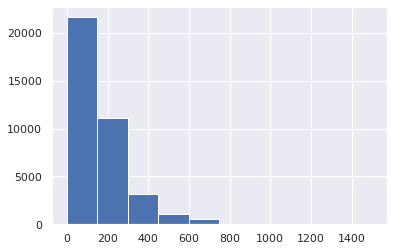

In [16]:
pd.Series(rev_len).hist()
plt.show()

In [17]:
pad_max=np.quantile(rev_len, 0.999)
pad_max

783.0059999999794

**Observations** :

1.   Mean length of reviews is 175 (approx).
2.   minimum length of reviews is 0.
3.   maximum length of reviews is 1733.
4.   99.9% of reviews are within the length 800.


### Padding

Now we will pad each of the sequence to max length 

In [18]:
def padding(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for i, review in enumerate(sentences):
        if len(review) != 0:
            features[i, -len(review):] = np.array(review)[:seq_len]
    return features

In [19]:
# maximum padding length is 800 
# since only 0.1% of the reviews are above this length
X_train_pad = padding(X_train, 800)
X_test_pad = padding(X_test, 800)


### Batching and loading as tensor

In [20]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(X_train_pad), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [21]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_X, sample_y = dataiter.next()

print('Tensor size: ', sample_X.size()) # batch_size, seq_length
print('Reviews: \n', sample_X)
print('Sentiments: \n', sample_y)

Tensor size:  torch.Size([50, 800])
Reviews: 
 tensor([[  0,   0,   0,  ...,  60,   2, 544],
        [  0,   0,   0,  ..., 127,   3, 127],
        [  0,   0,   0,  ...,  10, 399,   4],
        ...,
        [  0,   0,   0,  ..., 661,  10,  17],
        [  0,   0,   0,  ...,   4,  10,  17],
        [  0,   0,   0,  ...,  31,   7,  31]])
Sentiments: 
 tensor([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1])


We need to add an embedding layer because there are less words in our vocabulary. It is massively inefficient to one-hot encode that many classes. So, instead of one-hot encoding, we can have an embedding layer and use that layer as a lookup table. You could train an embedding layer using Word2Vec, then load it here. But, it's fine to just make a new layer, using it for only dimensionality reduction, and let the network learn the weights.

### Model Designing

In [22]:
from torch import nn

class SentimentLSTM(nn.Module):
    
    def __init__(self, n_vocab, n_embed, n_hidden, n_output, n_layers, drop_p = 0.5):
        super().__init__()
        # params: "n_" means dimension
        self.n_vocab = n_vocab     # number of unique words in vocabulary
        self.n_layers = n_layers   # number of LSTM layers 
        self.n_hidden = n_hidden   # number of hidden nodes in LSTM
        
        self.embedding = nn.Embedding(n_vocab, n_embed)
        self.lstm = nn.LSTM(n_embed, n_hidden, n_layers, batch_first = True, dropout = drop_p)
        self.dropout = nn.Dropout(drop_p)
        self.fc = nn.Linear(n_hidden, n_output)
        self.sigmoid = nn.Sigmoid()
        
        
    def forward (self, input_words, h):
        batch_size = input_words.size(0)                          # INPUT   :  (batch_size, seq_length)
        embedded_words = self.embedding(input_words)    # (batch_size, seq_length, n_embed)
        lstm_out, h = self.lstm(embedded_words)         # (batch_size, seq_length, n_hidden)
        lstm_out = self.dropout(lstm_out)
        lstm_out = lstm_out.contiguous().view(-1, self.n_hidden) # (batch_size*seq_length, n_hidden)
        fc_out = self.fc(lstm_out)                      # (batch_size*seq_length, n_output)
        sigmoid_out = self.sigmoid(fc_out)              # (batch_size*seq_length, n_output)
        sigmoid_out = sigmoid_out.view(batch_size, -1)  # (batch_size, seq_length*n_output)
        
        # extract the output of ONLY the LAST output of the LAST element of the sequence
        sigmoid_last = sigmoid_out[:, -1]               # (batch_size, 1)
        
        return sigmoid_last, h
    
    
    def init_hidden (self, batch_size):  # initialize hidden weights (h,c) to 0
        
        device = "cuda" if torch.cuda.is_available() else "cpu"
        weights = next(self.parameters()).data
        h = (weights.new(self.n_layers, batch_size, self.n_hidden).zero_().to(device),
             weights.new(self.n_layers, batch_size, self.n_hidden).zero_().to(device))
        
        return h

In [24]:
n_vocab = len(vocab)+1
n_embed = 100
n_hidden = 32
n_output = 1   # 1 ("positive") or 0 ("negative")
n_layers = 2

net = SentimentLSTM(n_vocab, n_embed, n_hidden, n_output, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(1001, 100)
  (lstm): LSTM(100, 32, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


### Training

In [25]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.1)


print_every = 50
step = 0
n_epochs = 3
clip = 5  
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loss=[]
train_acc=[]

def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

for epoch in range(n_epochs):
    h = net.init_hidden(batch_size)
    for inputs, labels in train_loader:
        step += 1
        inputs, labels = inputs.to(device), labels.to(device)
        
        # making requires_grad = False for the latest set of h
        h = tuple([each.data for each in h])   
        
        net.zero_grad()
        output, h = net(inputs, h)


        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        accuracy = acc(output,labels)

        nn.utils.clip_grad_norm(net.parameters(), clip)
        optimizer.step()

        
        if (step % print_every) == 0:
          lossval=loss.item()
          accval=accuracy         

          print("Epoch: {}/{}".format((epoch+1), n_epochs),
                "Step: {}".format(step),
                "Loss: {:.4f}".format(lossval),
                "Accuracy: {:.4f}".format(accval/batch_size)
                )

          train_loss.append(lossval)
          train_acc.append(accval)

          net.train()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Epoch: 1/3 Step: 50 Loss: 0.6850 Accuracy: 0.6000
Epoch: 1/3 Step: 100 Loss: 0.7044 Accuracy: 0.4600
Epoch: 1/3 Step: 150 Loss: 0.7093 Accuracy: 0.5400
Epoch: 1/3 Step: 200 Loss: 0.7048 Accuracy: 0.4600
Epoch: 1/3 Step: 250 Loss: 0.7206 Accuracy: 0.5000
Epoch: 1/3 Step: 300 Loss: 0.6919 Accuracy: 0.5000
Epoch: 1/3 Step: 350 Loss: 0.7273 Accuracy: 0.4800
Epoch: 1/3 Step: 400 Loss: 0.6949 Accuracy: 0.5200
Epoch: 1/3 Step: 450 Loss: 0.7242 Accuracy: 0.4800
Epoch: 1/3 Step: 500 Loss: 0.7155 Accuracy: 0.4800
Epoch: 1/3 Step: 550 Loss: 0.7183 Accuracy: 0.5400
Epoch: 1/3 Step: 600 Loss: 0.6966 Accuracy: 0.4800
Epoch: 1/3 Step: 650 Loss: 0.7009 Accuracy: 0.5400
Epoch: 1/3 Step: 700 Loss: 0.6760 Accuracy: 0.4800
Epoch: 1/3 Step: 750 Loss: 0.6952 Accuracy: 0.5400
Epoch: 2/3 Step: 800 Loss: 0.7021 Accuracy: 0.5400
Epoch: 2/3 Step: 850 Loss: 0.6987 Accuracy: 0.5000
Epoch: 2/3 Step: 900 Loss: 0.6946 Accuracy: 0.4800
Epoch: 2/3 Step: 950 Loss: 0.6897 Accuracy: 0.5200
Epoch: 2/3 Step: 1000 Loss: 0.71

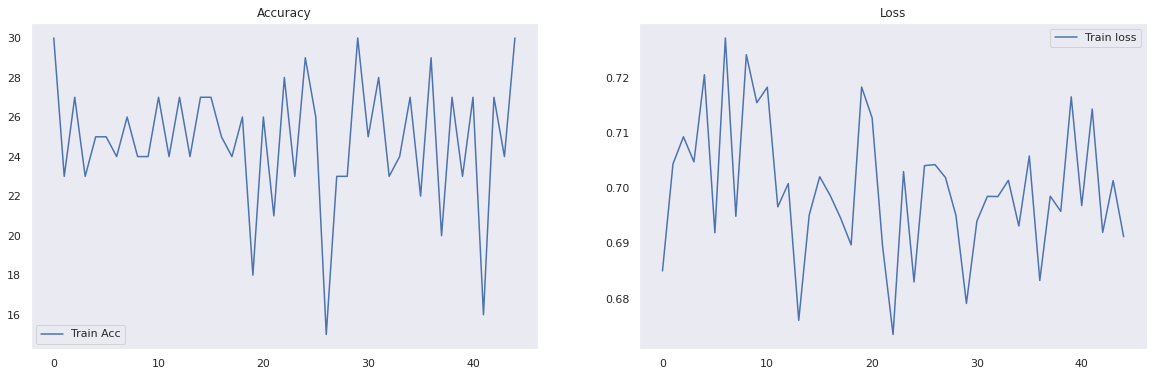

In [32]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Acc')
#plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train loss')
#plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

### Inference

In [29]:
def predict_text(text):
        word_seq = np.array([vocab[preprocess_string(word)] for word in text.split() 
                         if preprocess_string(word) in vocab.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(padding(word_seq,500))
        inputs = pad.to(device)
        batch_size = 1
        h = net.init_hidden(batch_size)
        h = tuple([each.data for each in h])
        output, h = net(inputs, h)
        return(output.item())

In [33]:

index = 30
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is  : {df["sentiment"][index]}')
print('='*70)
pro = predict_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status} with a probability of {pro}')

Taut and organically gripping, Edward Dmytryk's Crossfire is a distinctive suspense thriller, an unlikely "message" movie using the look and devices of the noir cycle.<br /><br />Bivouacked in Washington, DC, a company of soldiers cope with their restlessness by hanging out in bars. Three of them end up at a stranger's apartment where Robert Ryan, drunk and belligerent, beats their host (Sam Levene) to death because he happens to be Jewish. Police detective Robert Young investigates with the help of Robert Mitchum, who's assigned to Ryan's outfit. Suspicion falls on the second of the three (George Cooper), who has vanished. Ryan slays the third buddy (Steve Brodie) to insure his silence before Young closes in.<br /><br />Abetted by a superior script by John Paxton, Dmytryk draws precise performances from his three starring Bobs. Ryan, naturally, does his prototypical Angry White Male (and to the hilt), while Mitchum underplays with his characteristic alert nonchalance (his role, howeve

In [31]:

index = 32
print(df['review'][index])
print('='*70)
print(f'Actual sentiment is  : {df["sentiment"][index]}')
print('='*70)
pro = predict_text(df['review'][index])
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'predicted sentiment is {status} with a probability of {pro}')

My first exposure to the Templarios & not a good one. I was excited to find this title among the offerings from Anchor Bay Video, which has brought us other cult classics such as "Spider Baby". The print quality is excellent, but this alone can't hide the fact that the film is deadly dull. There's a thrilling opening sequence in which the villagers exact a terrible revenge on the Templars (& set the whole thing in motion), but everything else in the movie is slow, ponderous &, ultimately, unfulfilling. Adding insult to injury: the movie was dubbed, not subtitled, as promised on the video jacket.
Actual sentiment is  : negative
predicted sentiment is negative with a probability of 0.5027157068252563


Some improvement suggestions are as follow:

* Running a hyperparameter search to optimize your configurations.
* Using pretraned word embeddings like Glove word embeddings
* Increasing the model complexity like adding more layers/ using bidirectional LSTMs
